In [40]:
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [4]:
x = np.random.uniform(0.0, 5.0, 250)
print(x)

[3.56254666 3.79715983 1.23046416 4.33024897 3.68610023 4.02837241
 4.5556129  0.71914972 1.83237289 4.75002704 3.65443833 0.94252505
 1.21087702 0.9377532  0.92893241 1.77741082 2.35610604 3.47114905
 2.2385161  4.96011616 2.0372165  0.76836147 3.81905596 2.08706365
 0.16491926 4.03514365 0.24916629 2.81291303 1.3322013  2.52598784
 1.21104073 4.91577735 4.97108133 4.43130698 2.29329592 0.47037877
 1.22442523 0.69628312 3.54317008 2.11961648 3.90407488 3.64088767
 2.07144417 1.74394825 1.70895358 3.92051847 3.95417997 0.28108893
 1.42410153 0.93588602 1.77779051 1.19547782 3.1875946  3.24215129
 0.43128247 3.33480635 3.97531433 3.54596027 4.08524613 3.47714473
 3.47103636 1.72900024 1.22904999 1.97143768 1.68826646 0.42425432
 3.11668012 3.43968006 3.03220124 2.89225555 0.71742155 1.6908341
 4.21473375 1.49348496 0.2206609  0.85719573 0.84465042 0.45393092
 0.04120777 3.67822652 4.3830853  1.30386329 4.25463031 0.82758054
 4.64998747 4.37140545 4.69474033 3.84384346 0.06032863 3.57809

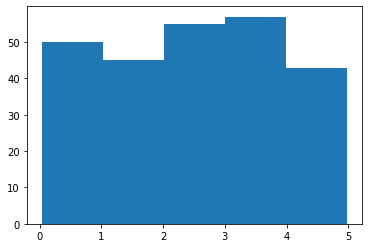

In [6]:
plt.hist(x, bins=5)
plt.show()

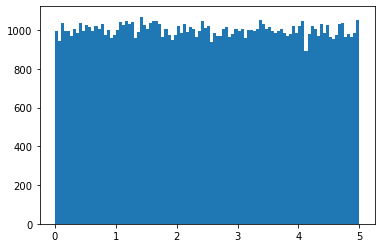

In [9]:
y = np.random.uniform(0.0, 5.0, 100000)
plt.hist(y, bins=100)
plt.show()

Normal Data Distribution

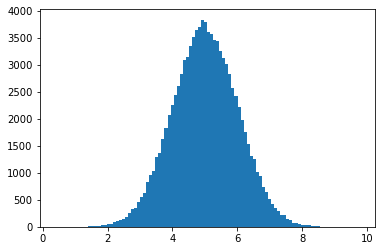

In [12]:
z = np.random.normal(5.0, 1.0, 100000)
plt.hist(z, 100)
plt.show()

Scatter plots with Data Distribution

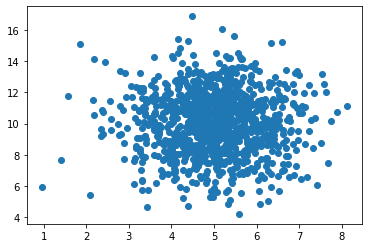

In [13]:
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x,y)
plt.show()

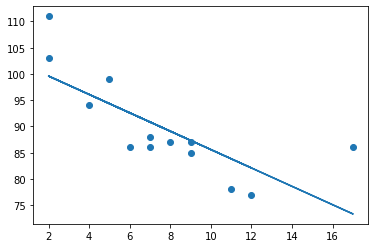

Relationship:  -0.758591524376155
P:  0.0026468739224561064


In [24]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x,y)

def my_func(x_value):
    return slope * x_value + intercept

my_model = list(map(my_func, x))

plt.scatter(x,y)
plt.plot(x, my_model)
plt.show()

print("Relationship: ", r)
print("P: ", p)

In [26]:
# Predict Future values
age = 10
speed = my_func(age)
print("For age={}, the speed is={}".format(age, speed))

For age=10, the speed is=85.59308314937454


TRAIN / TEST

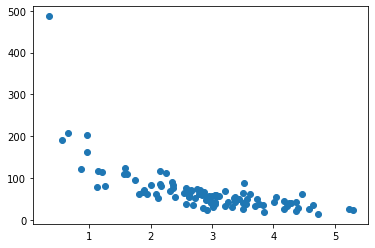

In [28]:
X = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / X

plt.scatter(X, y)
plt.show()

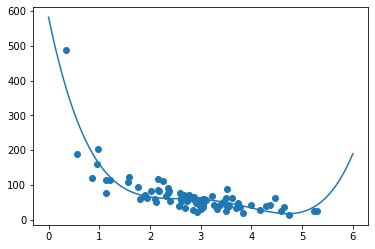

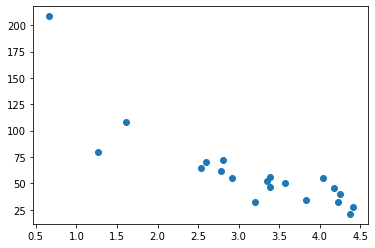

In [34]:
# Split Into Train/Test
X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

# Fit the dataset
my_model = np.poly1d(np.polyfit(X_train, y_train, 4))
my_line = np.linspace(0, 6, 100)

# Displaying training set
plt.scatter(X_train, y_train)
plt.plot(my_line, my_model(my_line))
plt.show()

# displaying testing set
plt.scatter(X_test, y_test)
plt.show()

DECISION TREE

In [41]:
df = pd.read_csv('data2.csv')
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

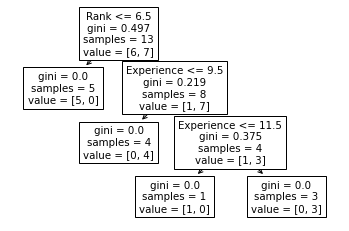

In [42]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)

tree.plot_tree(dtree, feature_names=features)